# Megaline Mobile Carrier Machine Learning Model

### Project Introduction

The project goal is to develop a model with the highest possible accuracy for our client Megaline a popular mobile carrier. For this project, our client is expecting an accuracy threshold of at least 0.75.

### Analysis Outline

To complete our goals, we are going to perform the following tasks:

• Used pandas, sklearn, and matplotlib libraries to create machine learning models

• Split the sample data into a training set, a validation set, and a test set

• Investigated the quality of different models by changing hyperparameters of each model

• Checked the quality of the model using the test set

• Sanity checked each model type

## Importing Files and Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.dummy import DummyClassifier

In [2]:
try:
    users_behavior = pd.read_csv('users_behavior.csv', sep=',')
except:
    users_behavior = pd.read_csv('/datasets/users_behavior.csv', sep=',')

## Pre-processing Data and Data Prep

First we need to process the data for any duplicate entries, missing values, or mistyped values

In [3]:
users_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
users_behavior.columns

Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')

In [5]:
users_behavior.duplicated().sum()

0

In [6]:
users_behavior.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

Next, we need to prep our input data to be useable for our future models. To prep the data we need to divide our current data into a training set, a validation set, and a test set at a 3:1:1 ratio by using the train_test_split function.

In [7]:
ub_train_valid, ub_test = train_test_split(users_behavior, test_size=0.20, random_state=12345)

In [8]:
ub_train, ub_valid = train_test_split(ub_train_valid, test_size=0.25, random_state=12345)

In [9]:
print(ub_train.shape)
print(ub_valid.shape)
print(ub_test.shape)

(1928, 5)
(643, 5)
(643, 5)


Our training set has 60% of the total data (1928/3214) and each of the validation set and test set will have 20% of the total data (643/3214)

After splitting our data into three analysis groups, we now need to separate our target columns from the feature columns of each analysis groups.

In [10]:
features_train = ub_train.drop(['is_ultra'], axis=1)
target_train = ub_train['is_ultra']

In [11]:
features_valid = ub_valid.drop(['is_ultra'], axis=1)
target_valid = ub_valid['is_ultra']

In [12]:
features_test = ub_test.drop(['is_ultra'], axis=1)
target_test = ub_test['is_ultra']

## Model Accuracy Training and Validation Set Analysis

### Decision Tree Model

Creating a function that can calculate the accuracy score for a decision tree based on its max_depth parameter.

In [13]:
def dectree (depth):
    tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    tree_model.fit(features_train, target_train)
    predictions_valid = tree_model.predict(features_valid)
    return accuracy_score(target_valid, predictions_valid)

Using the previous fuction to be used in a dataframe to create a graphic on the accuracy score of vari

In [14]:
dt = pd.DataFrame({1 : [dectree(1)],
                   2 : [dectree(2)],
                   3 : [dectree(3)],
                   4 : [dectree(4)],
                   5 : [dectree(5)]})

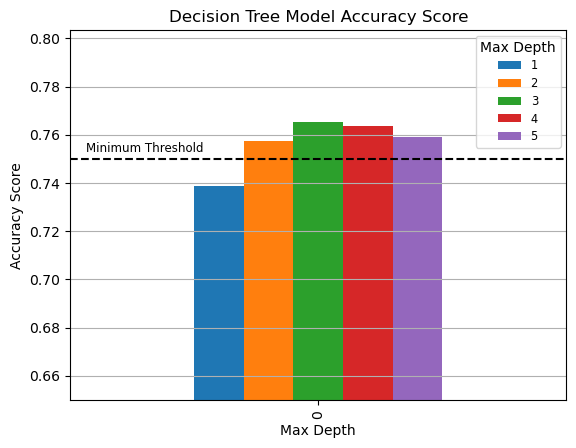

In [15]:
dt.plot(kind='bar',
        title='Decision Tree Model Accuracy Score',
        ylim=0.65,
        xlabel='Max Depth',
        ylabel='Accuracy Score')
plt.axhline(y=0.75, color='black', linestyle='--')
plt.text(-0.35, 0.753, 'Minimum Threshold', wrap=True, horizontalalignment='center', fontsize=8.5)
plt.legend(title='Max Depth',
           fontsize="8.25",
           loc='upper right')
plt.grid(axis='y')
plt.show()

Based the decision tree model, it shows that max_depth of 3 would yield the highest accuacy score that also met the 0.75 threshold. At a max_depth less than 3 the data would be underfitted and over 3 would be overfitted.

### Random Forest Model

For the random forest model we will change the n_estimators value to find the highest accuracy score for this model

In [16]:
def ranforest (est):
    rforest_model = RandomForestClassifier(random_state=12345, n_estimators=est)
    rforest_model.fit(features_train, target_train)
    score = rforest_model.score(features_valid, target_valid)
    return score

Creating a dataframe to chart the scores from the random forest model

In [17]:
rf = pd.DataFrame({1 : [ranforest(1)],
                   2 : [ranforest(2)],
                   3 : [ranforest(3)],
                   4 : [ranforest(4)],
                   5 : [ranforest(5)],
                   6 : [ranforest(6)],
                   7 : [ranforest(7)],
                   8 : [ranforest(8)],
                   9 : [ranforest(9)],
                   10 : [ranforest(10)],
                   11 : [ranforest(11)],
                   12 : [ranforest(12)],
                   13 : [ranforest(13)],
                   14 : [ranforest(14)],
                   15 : [ranforest(15)]})

In [18]:
def ranforest (est):
    rforest_model = RandomForestClassifier(random_state=12345, n_estimators=est)
    rforest_model.fit(features_train, target_train)
    score = rforest_model.score(features_valid, target_valid)
    return score

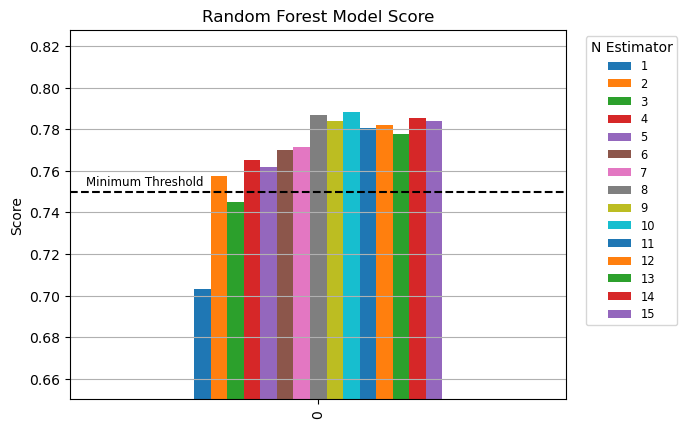

In [19]:
rf.plot(kind='bar',
        title='Random Forest Model Score',
        ylim=0.65,
        ylabel='Score')
plt.axhline(y=0.75, color='black', linestyle='--')
plt.text(-0.35, 0.753, 'Minimum Threshold', wrap=True, horizontalalignment='center', fontsize=8.5)
plt.legend(title='N Estimator',
           fontsize="8.25",
           loc=(1.04, 0.2))
plt.grid(axis='y')
plt.show()

Based the random forest model, it shows the highest score so far and the best n_estimator value would be 10. Any value under 10 would be noticably underfitting and values over 10 would be overfitting.

### Logistic Regression Model

For the logistic regression model we will calculate the accuracy score using the LogisticRegression function

In [20]:
logr_model = LogisticRegression(random_state=12345, solver='liblinear')
logr_model.fit(features_train, target_train) 
score_train = logr_model.score(features_train, target_train) 
score_valid = logr_model.score(features_valid, target_valid)

Creating a dataframe to chart our results from the logistic regression model

In [21]:
lr = pd.DataFrame({'training_score' : [score_train],
                   'valid_score' : [score_valid]})

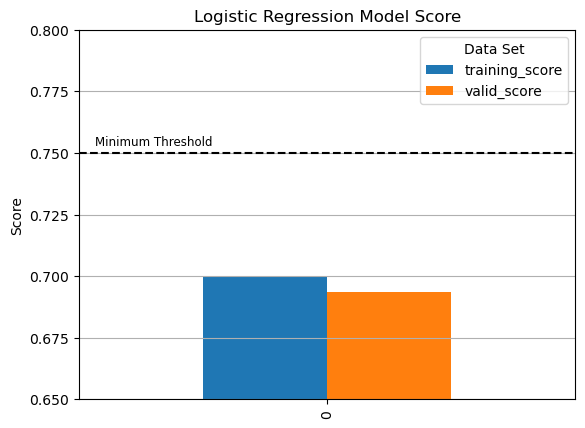

In [22]:
lr.plot(kind='bar',
        title='Logistic Regression Model Score',
        ylim=0.65,
        ylabel='Score')
plt.yticks([0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8])
plt.axhline(y=0.75, color='black', linestyle='--')
plt.text(-0.35, 0.753, 'Minimum Threshold', wrap=True, horizontalalignment='center', fontsize=8.5)
plt.legend(title='Data Set',
           loc='upper right')
plt.grid(axis='y')
plt.show()

Based on the training and validation sets, the logistic regression model showed the lowest accuracy values when compared to the previous models. The logistic regression model did not reach the threshold of 0.75 accuracy in either the training set or the validation set.

### Model Comparison using Test Set

Now we use the same models as before except now we use the test dataset instead of the valid dataset

In [23]:
dtree_model = DecisionTreeClassifier(random_state=12345, max_depth=3)
dtree_model.fit(features_train, target_train)
predictions_test = dtree_model.predict(features_test)
dt_score = accuracy_score(target_test, predictions_test)
print('Decision Tree Model Accuracy Score =', dt_score)

Decision Tree Model Accuracy Score = 0.7869362363919129


In [24]:
rforest_model = RandomForestClassifier(random_state=12345, n_estimators=13)
rforest_model.fit(features_train, target_train)
rf_score = rforest_model.score(features_test, target_test)
print('Random Forest Model Accuracy Score =', rf_score)

Random Forest Model Accuracy Score = 0.7916018662519441


In [25]:
score_test = logr_model.score(features_test, target_test)
print('Logistic Regression Model Accuracy Score =', score_test)

Logistic Regression Model Accuracy Score = 0.6967340590979783


Creating a dataframe with all the model test set results

In [26]:
model_compare = pd.DataFrame({'Decision Tree' : [dt_score],
                              'Random Forest' : [rf_score],
                              'Logistic Regression' : [score_test]})

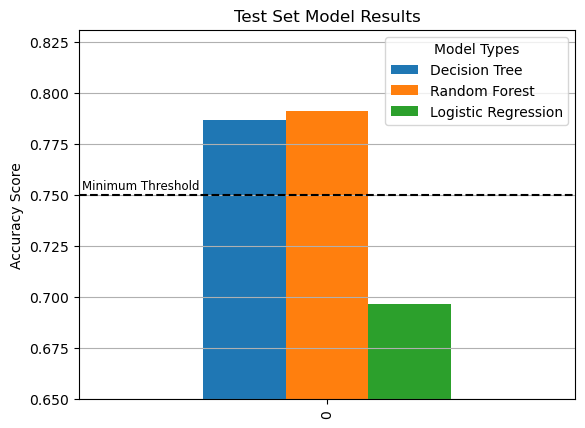

In [27]:
model_compare.plot(kind='bar',
        title='Test Set Model Results',
        ylim=0.65,
        ylabel='Accuracy Score')
plt.axhline(y=0.75, color='black', linestyle='--')
plt.text(-0.375, 0.753, 'Minimum Threshold', wrap=True, horizontalalignment='center', fontsize=8.5)
plt.legend(title='Model Types',
           loc='upper right')
plt.grid(axis='y')
plt.show()

Based on the test data sets, the random forest model did the best with an accuracy score higher than the 0.75 threshold. The logistic regression model did very poorly compared to the others with an accuracy score well below the 0.75 threshold.

### Sanity Check

In [28]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(features_train, target_train)
dummy_score = dummy_clf.score(features_test, target_test)
print(dummy_score)

0.6951788491446346


In [29]:
try:
  assert rf_score > dummy_score
  print('Sanity Check Passed')
except:
  print('Sanity Check Failed')

Sanity Check Passed


Our dummy model outputed a value of 0.69 and shows that this is a baseline of what the minimum accuracy score should be.

## Conclusion

 In conclusion, the model we have built with the highest accuracy would be the random forest model. From the dummy model, it shows us that the minimum accuracy score we should expect is 0.69. However, the random forest model had a 0.79 accuracy score well above the dummy score of 0.69 and the client expected a minimum score of 0.75. This is to be expected as the random forest model usually has the highest accuracy score when compared to the other model types.